In [1]:
# Import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for lat and long cities
lat_lngs = []
cities = []

# Create a set of random lat and lng 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)



In [3]:

column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
no_cities = 500
cities_df = pd.DataFrame(columns = column_names, index = np.arange(0,no_cities))

In [4]:
# Create a Dataframe based on the city names
element_df = {
    "City": "",
    "Cloudiness": 0,
    "Country" : "",
    "Date" : 0,
    "Humidity" : 0,
    "Lat" : 0,
    "Lng" : 0,
    "Max Temp" : 0,
    "Wind Speed" : 0
}


params = {
    "appid" : "9a6563af7d127293fbfbe4d94247ba1b",
    "q" : "",
    "units": "metric"
}

city_index = 0

df_index = 0

for page in range(0,7):    
    for result in range(0,100):
        if(df_index == 500):
            break;        
        params["q"] = cities[city_index] 
        base_url = "http://api.openweathermap.org/data/2.5/weather"
        try:
            print(f"City {df_index}: {cities[city_index]}")
            response = requests.get(base_url,params=params).json()
            cities_df["City"][df_index] = response["name"]
            cities_df["Cloudiness"][df_index] = response["clouds"]["all"]
            cities_df["Country"][df_index] = response["sys"]["country"]
            cities_df["Date"][df_index] = response["dt"]
            cities_df["Humidity"][df_index] = round(float(response["main"]["humidity"]),2)
            cities_df["Lat"][df_index] = round(float(response["coord"]["lat"]),2)
            cities_df["Lng"][df_index] = round(float(response["coord"]["lon"]),2)
            cities_df["Max Temp"][df_index] = round(float(response["main"]["temp_max"]),2)
            cities_df["Wind Speed"][df_index] = round(float(response["wind"]["speed"]),2)
            df_index += 1
        except KeyError:
            print(f"City not found")
            df_index += 1
        city_index += 1


City 0: mahebourg
City 1: nanortalik
City 2: pevek
City 3: mandera
City 4: atuona
City 5: ulladulla
City 6: busselton
City 7: zhezkazgan
City 8: longyearbyen
City 9: lakatoro
City 10: thompson
City 11: geraldton
City 12: cadiz
City 13: misratah
City 14: pervoye maya
City 15: albany
City 16: punta arenas
City 17: mataura
City 18: ushuaia
City 19: saskylakh
City 20: mar del plata
City 21: talcahuano
City 22: saleaula
City not found
City 23: kapaa
City 24: illoqqortoormiut
City not found
City 25: bargal
City not found
City 26: hermanus
City 27: ribeira grande
City 28: altamira
City 29: tasiilaq
City 30: waingapu
City 31: raga
City 32: clyde river
City 33: bereda
City 34: east london
City 35: north bend
City 36: port alfred
City 37: namtsy
City 38: la ronge
City 39: barentsburg
City not found
City 40: provideniya
City 41: tarn taran
City 42: beipiao
City 43: kaeo
City 44: rikitea
City 45: riyadh
City 46: puerto ayora
City 47: fortuna
City 48: cape town
City 49: severo-kurilsk
City 50: cidr

City 405: yelizovo
City 406: san patricio
City 407: raudeberg
City 408: kon tum
City 409: iiyama
City 410: majene
City 411: port-gentil
City 412: isangel
City 413: kintampo
City 414: mabaruma
City 415: kondoa
City 416: tual
City 417: dunedin
City 418: katha
City not found
City 419: chervona sloboda
City 420: ampanihy
City 421: kruisfontein
City 422: sao joao da barra
City 423: pitsunda
City 424: galiwinku
City not found
City 425: new ross
City 426: meulaboh
City 427: tolaga bay
City 428: zhangye
City 429: namwala
City 430: georgetown
City 431: ust-ishim
City 432: agadez
City 433: puerto carreno
City 434: mildura
City 435: half moon bay
City 436: pandan
City 437: port-cartier
City 438: rolim de moura
City not found
City 439: thunder bay
City 440: rabupura
City 441: rockland
City 442: awbari
City 443: bengkulu
City 444: mendahara
City not found
City 445: frontera
City 446: zhengjiatun
City 447: tongling
City 448: olinala
City 449: mersing
City 450: pangnirtung
City 451: aguilas
City 452:

In [5]:
# Export the dataframe
cities_df.to_csv("../output_data/cities.csv",index=False)

cities_df = pd.read_csv("../output_data/cities.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahébourg,40.0,MU,1.593578e+09,93.0,-20.41,57.70,18.00,1.50
1,Nanortalik,84.0,GL,1.593578e+09,87.0,60.14,-45.24,4.53,3.09
2,Pevek,100.0,RU,1.593578e+09,85.0,69.70,170.31,3.52,4.21
3,Mandera,77.0,KE,1.593578e+09,61.0,3.94,41.87,26.26,9.25
4,Atuona,2.0,PF,1.593578e+09,74.0,-9.80,-139.03,26.40,9.76


In [6]:
# Set min and max limits to display graphs
min_Lat = cities_df["Lat"].min() - 5
max_Lat = cities_df["Lat"].max() +  5

#### Latitude vs. Temperature Plot

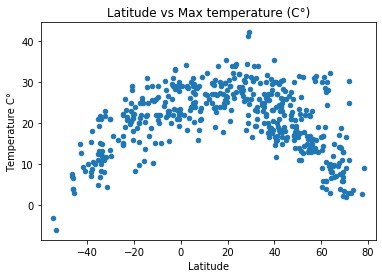

In [23]:
cities_df.plot(x="Lat",y="Max Temp", kind="scatter",title="Latitude vs Max temperature (C°)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")
plt.savefig("../output_data/Latitude vs Max temperature (C°).png")
plt.show()



It is shown that the temperature is higher in the Ecuador (latitude 0) and decreases if the latitude is higher or lower. Is  clear relationship between the temperature and the Latitude.

#### Latitude vs. Humidity Plot

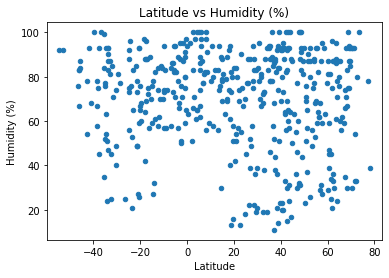

In [24]:
cities_df.plot(x="Lat", y="Humidity",kind="scatter",title="Latitude vs Humidity (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Latitude vs Humidity (%).png")
plt.show()



 There is a high concentration of humidity around the Earth  regardless the location. The realtion between these variables is not so clear. 


#### Latitude vs. Cloudiness Plot

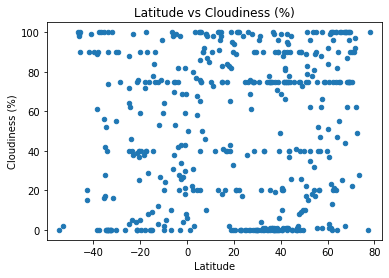

In [25]:
cities_df.plot(x="Lat", y="Cloudiness", kind="scatter",title="Latitude vs Cloudiness (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Latitude vs Cloudiness (%).png")
plt.show()


This graph shows a constante cloudiness percentage for some cities in different location.
We can see some  line patterns,  in some cases, the places situated at the same latitude may present absence of cloudiness. As a result, Latitud does not determine the cloudiness percentage

#### Latitude vs. Wind Speed Plot

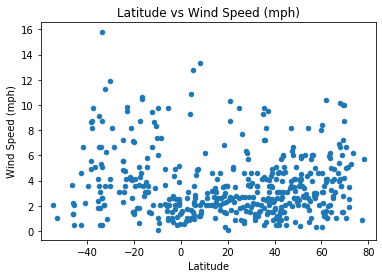

In [26]:
cities_df.plot(x="Lat", y="Wind Speed", kind="scatter",title="Latitude vs Wind Speed (mph)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Latitude vs Wind Speed (mph).png")
plt.show()


The graph shows low wind speeds concentrations but it´s more visible at high latitudes. 

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["Lat"] > 0.0]
southern_df = cities_df.loc[cities_df["Lat"] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r values is: -0.63
 The equation is: -0.25x + -0.25


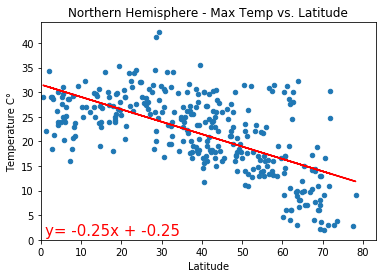

In [27]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)


for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Northern Hemisphere - Max Temp vs. Latitude", xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

# Add the equation in the graph
ax.text(0.012, 0.02, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")


plt.show()


This graph shows a negative correlation between latitud and max temperature in the Northern Hemisphere.
value of -0.63 confirms the negative correlation we obseve in the graph

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r values is: 0.76
 The equation is: 0.42x + 0.42


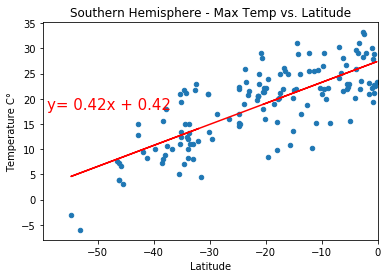

In [28]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = southern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Southern Hemisphere - Max Temp vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

# Add the equation in the graph
ax.text(0.012, 0.60, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")
plt.show()



This graph shows a positive correlation between latitud and Temperature in the Southern Hemisphere.
The closer  we are from the Ecuator, the warmer it gets.
The 0.76 rvalue shows a positive correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r values is: -0.1
 The equation is: -0.12x + -0.12


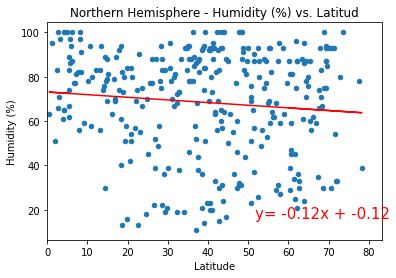

In [29]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Northern Hemisphere - Humidity (%) vs. Latitud",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add the equation in the graph
ax.text(0.62, 0.10, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitud.png")
plt.show()



This graph shows a lightly negative correlation between humidity and latitude towards northern locations.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r values is: 0.05
 The equation is: 0.07x + 0.07


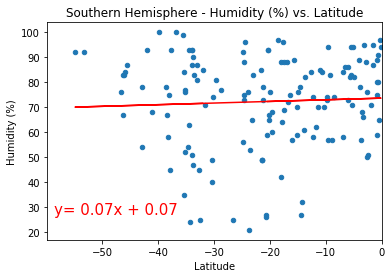

In [30]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = southern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Southern Hemisphere - Humidity (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add the equation in the graph
ax.text(0.02, 0.12, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()



This graph shows an visible pattern of high humidity moving towards the Ecuator. The r value demonstrates a slighlty  pisitive correlation between humidity and latitude that can be hardly perceived in the data.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r values is: 0.03
 The equation is: 0.06x + 0.06


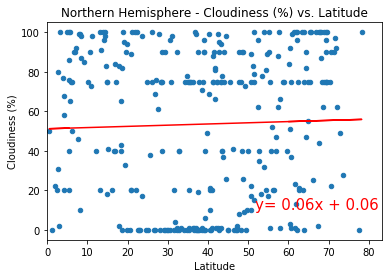

In [31]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Northern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add the equation in the graph
ax.text(0.62, 0.14, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()



The r value shows a small positive correlation, but it´s not clearly perceived in the graph.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r values is: -0.08
 The equation is: -0.22x + -0.22


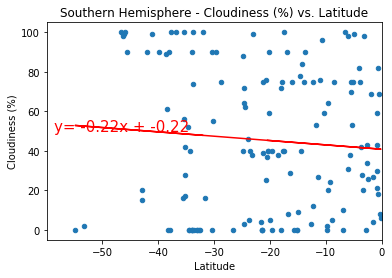

In [32]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

ax = southern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Southern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add the equation in the graph
ax.text(0.02, 0.50, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()



For the Southern Hemisphrere we observe a similar pattern in which the closer to the Ecuator, the greater percentage of cloudiness we consider.
Statistically we have a considerable negative correlation between latitude and cloudiness by looking at the r value


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r values is: 0.15
 The equation is: 0.02x + 0.02


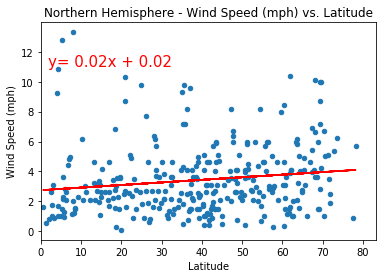

In [33]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

ax = northern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Northern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add the equation in the graph
ax.text(0.02, 0.80, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()



For the Northern Hemisphere we observe that the majority of the locations present low speed wind ranges.
Statiscally, we have a slightly positive correlation between wind speed and latitud.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r values is: -0.17
 The equation is: -0.04x + -0.04


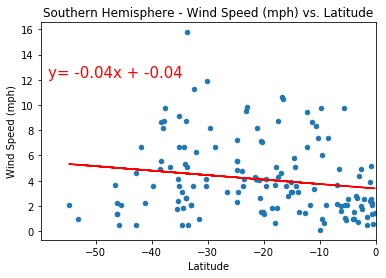

In [34]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Add the equation in the graph
ax = southern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Southern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
ax.text(0.02, 0.75, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()


The Southern Hemisphere presents a negative correlation as we get closer to the Ecuator, the wind speed descends.
We can perceive thiss patter in the data by looking at the concentration of points near the Ecuator